In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://mirror.its.dal.ca/apache/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
# !ls
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install spark_sklearn

     |████████████████████████████████| 4.9MB 8.1MB/s 
  Created wheel for spark-sklearn: filename=spark_sklearn-0.3.0-cp36-none-any.whl size=30592 sha256=dffed5d2b8ecc68183147af41dd2cac0a3cb5f86d2853c74d0f2108ef94ae047
  Stored in directory: /root/.cache/pip/wheels/64/28/e8/cb0250888675c630786f932dcc63ed96ac1aca299bcfb7235f
Successfully built spark-sklearn
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.2 which is incompatible.
ERROR: imbalanced-learn 0.4.3 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.2 which is incompatible.
  Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()

In [0]:
#import library

import time
from scipy import stats
import pyspark
from pyspark import SparkContext, SparkConf
sc = pyspark.SparkContext()
import os
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor

Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [0]:
training = pd.read_csv("/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Dataset/training/trainingSet_noEmpty.csv")
testing = pd.read_csv("/content/drive/My Drive/CityU CS/2019-2020 SemB/CS 4514/Dataset/testing/testingSet_noEmpty.csv")

print(training.shape)
print(training.columns)
print()
print(testing.shape)
print(testing.columns)

(2690, 123)
Index(['Spanish Div', 'Year', 'Month', 'Day', 'FTHG', 'FTAG', 'HTHG', 'HTAG',
       'HS', 'AS',
       ...
       'AwayTeam_Sociedad', 'AwayTeam_Sp Gijon', 'AwayTeam_Valencia',
       'AwayTeam_Valladolid', 'AwayTeam_Vallecano', 'AwayTeam_Villarreal',
       'HTR_A', 'HTR_D', 'HTR_H', 'FTR'],
      dtype='object', length=123)

(1140, 123)
Index(['Spanish Div', 'Year', 'Month', 'Day', 'FTHG', 'FTAG', 'HTHG', 'HTAG',
       'HS', 'AS',
       ...
       'AwayTeam_Sociedad', 'AwayTeam_Sp Gijon', 'AwayTeam_Valencia',
       'AwayTeam_Valladolid', 'AwayTeam_Vallecano', 'AwayTeam_Villarreal',
       'HTR_A', 'HTR_D', 'HTR_H', 'FTR'],
      dtype='object', length=123)


In [0]:
# convert back those attribute to int

training[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']] = training[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']].astype(int)

testing[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']] = testing[['Spanish Div','Year','Month','Day','FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY',
         'HR','AR']].astype(int)

In [0]:
training.iloc[:,65:122] = training.iloc[:,65:122].astype(int)
testing.iloc[:,65:122] = testing.iloc[:,65:122].astype(int)

In [0]:
training.rename(columns={"BbMx<2.5": "BbMx_less_than_2.5", "BbAv<2.5": "BbAv_less_than_2.5", "BbMx>2.5": "BbMx_more_than_2.5", "BbAv>2.5": "BbAv_more_than_2.5"},inplace = True)
testing.rename(columns={"BbMx<2.5": "BbMx_less_than_2.5", "BbAv<2.5": "BbAv_less_than_2.5", "BbMx>2.5": "BbMx_more_than_2.5", "BbAv>2.5": "BbAv_more_than_2.5"},inplace = True)

In [0]:
# Reorder the column in test set so that columns order in both training and testing set can remain consistent

testing = testing[training.columns.values]

In [0]:
training['FTR'] = training['FTR'].map({'A':0,'D':1,'H':2})
testing['FTR'] = testing['FTR'].map({'A':0,'D':1,'H':2})

In [0]:
print(training.shape)
print(testing.shape)

(2690, 123)
(1140, 123)


In [0]:
X_train = training.iloc[:,0:122]
Y_train = training.iloc[:,-1]

X_test = testing.iloc[:,0:122]
Y_test = testing.iloc[:,-1]

In [0]:
training.iloc[:,49:53].columns.values

array(['BbMx_more_than_2.5', 'BbAv_more_than_2.5', 'BbMx_less_than_2.5',
       'BbAv_less_than_2.5'], dtype=object)

In [0]:
testing.iloc[:,49:53].columns.values

array(['BbMx_more_than_2.5', 'BbAv_more_than_2.5', 'BbMx_less_than_2.5',
       'BbAv_less_than_2.5'], dtype=object)

In [0]:
import time
from sklearn.ensemble import RandomForestClassifier
import spark_sklearn
from spark_sklearn import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

In [0]:
def metrics_calculation(model_name,Y_true,Y_predict):
  #roc=roc_auc_score(Y_true, Y_predict)
  accuracy = accuracy_score(Y_true, Y_predict)
  precision = precision_score(Y_true, Y_predict,average=None)
  recall = recall_score(Y_true, Y_predict,average=None)
  f1 = f1_score(Y_true, Y_predict,average=None)
  metrics=  pd.DataFrame([[model_name,accuracy,precision,recall,f1]],columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
  return metrics

In [0]:
model_results = []
models = {}
confusion_matrices = []
time_results=[]

In [0]:
# Random Forest Classifier
parameters = {
    "max_depth": [3, None],
    "max_features": [1, 3, 5],
    "min_samples_split": [0.5, 0.9],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    "n_estimators": [10, 20, 40, 80]
}

In [0]:
start = time.time()
gs = spark_sklearn.GridSearchCV(sc,estimator=RandomForestClassifier(), cv=5,param_grid=parameters,n_jobs=-1)
gs.fit(X_train, Y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("RandomForestClassifier",finish - start))
time_results

Time required to do Parallel Grid Search CV: 245.99447989463806 seconds


[('RandomForestClassifier', 245.99447989463806)]

In [0]:
models['rfc'] = gs
predYtest = gs.predict(X_test)
model_results.append(metrics_calculation('Random Forest Classifier',Y_test,predYtest))
model_results

[                      Model  ...                                       F1 Score
 0  Random Forest Classifier  ...  [0.5331278890600925, 0.0, 0.6964155084125823]
 
 [1 rows x 5 columns]]

In [0]:
# confusion matrix

#confusion_matrices.append(confusion_matrix(Y_test,predYtest))
#confusion_matrices
print('Random Forest: ', confusion_matrix(Y_test,predYtest))
confusion_matrices.append(("RandomForestClassifier",confusion_matrix(Y_test,predYtest)))
confusion_matrices

Random Forest:  [[173   0 162]
 [ 76   0 188]
 [ 65   0 476]]


[('RandomForestClassifier', array([[173,   0, 162],
         [ 76,   0, 188],
         [ 65,   0, 476]]))]

In [0]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
parameters = {
    'max_depth':[2,4,6,8,10],
    'min_samples_leaf':[2,4,6,8,10], 
    'min_samples_split':[2,4,6,8,10],
    'criterion': ['gini','entropy']
}

In [0]:
start = time.time()
dt = DecisionTreeClassifier()
gs_dt = spark_sklearn.GridSearchCV(sc,estimator=dt,cv=5,param_grid=parameters,n_jobs=-1)
gs_dt.fit(X_train,Y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("DecisionTreeClassifier",finish - start))
time_results

Time required to do Parallel Grid Search CV: 57.17016077041626 seconds


[('RandomForestClassifier', 245.99447989463806),
 ('DecisionTreeClassifier', 57.17016077041626)]

In [0]:
models['dt'] = gs_dt
predYtest = gs_dt.predict(X_test)
model_results.append(metrics_calculation('Decision Tree',Y_test,predYtest))
model_results

[                      Model  ...                                       F1 Score
 0  Random Forest Classifier  ...  [0.5331278890600925, 0.0, 0.6964155084125823]
 
 [1 rows x 5 columns],
            Model  ...                                       F1 Score
 0  Decision Tree  ...  [1.0, 0.9943289224952742, 0.9972247918593895]
 
 [1 rows x 5 columns]]

In [0]:
# confusion matrix
print('Decision Tree: ', confusion_matrix(Y_test,predYtest))
confusion_matrices.append(("DecisionTreeClassifier",confusion_matrix(Y_test,predYtest)))
confusion_matrices

Decision Tree:  [[335   0   0]
 [  0 263   1]
 [  0   2 539]]


[('RandomForestClassifier', array([[173,   0, 162],
         [ 76,   0, 188],
         [ 65,   0, 476]])), ('DecisionTreeClassifier', array([[335,   0,   0],
         [  0, 263,   1],
         [  0,   2, 539]]))]

In [0]:
# KNN Classifier
parameters = {
    'n_neighbors': [3,5,10],
}

In [0]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier()
gs_knn = spark_sklearn.GridSearchCV(sc,estimator=knn,cv=5,param_grid=parameters,n_jobs=-1)
gs_knn.fit(X_train,Y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("KNeighborsClassifier",finish - start))
time_results

Time required to do Parallel Grid Search CV: 10.79816722869873 seconds


[('RandomForestClassifier', 245.99447989463806),
 ('DecisionTreeClassifier', 57.17016077041626),
 ('KNeighborsClassifier', 10.79816722869873)]

In [0]:
models['knn'] = gs_knn
predYtest = gs_knn.predict(X_test)
model_results.append(metrics_calculation('KNN Classifier',Y_test,predYtest))
model_results

[                      Model  ...                                       F1 Score
 0  Random Forest Classifier  ...  [0.5331278890600925, 0.0, 0.6964155084125823]
 
 [1 rows x 5 columns],
            Model  ...                                       F1 Score
 0  Decision Tree  ...  [1.0, 0.9943289224952742, 0.9972247918593895]
 
 [1 rows x 5 columns],
             Model  ...                                           F1 Score
 0  KNN Classifier  ...  [0.5462822458270107, 0.2820512820512821, 0.718...
 
 [1 rows x 5 columns]]

In [0]:
# confusion matrix
print('KNN Classifier: ', confusion_matrix(Y_test,predYtest))
confusion_matrices.append(("Classifier",confusion_matrix(Y_test,predYtest)))
confusion_matrices

KNN Classifier:  [[180  69  86]
 [ 86  66 112]
 [ 58  69 414]]


[('RandomForestClassifier', array([[173,   0, 162],
         [ 76,   0, 188],
         [ 65,   0, 476]])), ('DecisionTreeClassifier', array([[335,   0,   0],
         [  0, 263,   1],
         [  0,   2, 539]])), ('Classifier', array([[180,  69,  86],
         [ 86,  66, 112],
         [ 58,  69, 414]]))]

In [0]:
# Logistic Regression
parameters = {
  'C': [0.001, 0.01, 0.1, 1, 10], 
  'class_weight': [None, 'balanced'], 
  'penalty': ['l1', 'l2']
}

In [0]:
from sklearn.linear_model import LogisticRegression
start = time.time()
lr = LogisticRegression()
gs_lr = spark_sklearn.GridSearchCV(sc,estimator=lr,param_grid = parameters,cv=5,n_jobs=-1)
gs_lr.fit(X_train,Y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("LogisticRegression",finish - start))
time_results

Time required to do Parallel Grid Search CV: 71.47484254837036 seconds


[('RandomForestClassifier', 245.99447989463806),
 ('DecisionTreeClassifier', 57.17016077041626),
 ('KNeighborsClassifier', 10.79816722869873),
 ('LogisticRegression', 71.47484254837036)]

In [0]:
models['lr'] = gs_lr
predYtest = gs_lr.predict(X_test)
model_results.append(metrics_calculation('Logistic Regression',Y_test,predYtest))
model_results

[                      Model  ...                                       F1 Score
 0  Random Forest Classifier  ...  [0.5331278890600925, 0.0, 0.6964155084125823]
 
 [1 rows x 5 columns],
            Model  ...                                       F1 Score
 0  Decision Tree  ...  [1.0, 0.9943289224952742, 0.9972247918593895]
 
 [1 rows x 5 columns],
             Model  ...                                           F1 Score
 0  KNN Classifier  ...  [0.5462822458270107, 0.2820512820512821, 0.718...
 
 [1 rows x 5 columns],
                  Model  ...                                       F1 Score
 0  Logistic Regression  ...  [1.0, 0.9961977186311787, 0.9981549815498155]
 
 [1 rows x 5 columns]]

In [0]:
# Confusion Matrix
print('Logistic Regression: ', confusion_matrix(Y_test,predYtest))
confusion_matrices.append(("LogisticRegression",confusion_matrix(Y_test,predYtest)))
confusion_matrices

Logistic Regression:  [[335   0   0]
 [  0 262   2]
 [  0   0 541]]


[('RandomForestClassifier', array([[173,   0, 162],
         [ 76,   0, 188],
         [ 65,   0, 476]])), ('DecisionTreeClassifier', array([[335,   0,   0],
         [  0, 263,   1],
         [  0,   2, 539]])), ('Classifier', array([[180,  69,  86],
         [ 86,  66, 112],
         [ 58,  69, 414]])), ('LogisticRegression', array([[335,   0,   0],
         [  0, 262,   2],
         [  0,   0, 541]]))]

In [0]:
# SGD
parameters = {
  'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 
  'class_weight': [None, 'balanced']
}

In [0]:
from sklearn.linear_model import SGDClassifier
start = time.time()
sgd = SGDClassifier(loss="hinge")
gs_sgd = spark_sklearn.GridSearchCV(sc,estimator=sgd,param_grid = parameters,cv=5,n_jobs=-1)
gs_sgd.fit(X_train,Y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("SGD Classifier",finish - start))
time_results

Time required to do Parallel Grid Search CV: 3.845360279083252 seconds


[('RandomForestClassifier', 245.99447989463806),
 ('DecisionTreeClassifier', 57.17016077041626),
 ('KNeighborsClassifier', 10.79816722869873),
 ('LogisticRegression', 71.47484254837036),
 ('SGD Classifier', 3.845360279083252)]

In [0]:
models['sgd'] = gs_sgd
predYtest = gs_sgd.predict(X_test)
model_results.append(metrics_calculation('SGD',Y_test,predYtest))
model_results

[                      Model  ...                                       F1 Score
 0  Random Forest Classifier  ...  [0.5331278890600925, 0.0, 0.6964155084125823]
 
 [1 rows x 5 columns],
            Model  ...                                       F1 Score
 0  Decision Tree  ...  [1.0, 0.9943289224952742, 0.9972247918593895]
 
 [1 rows x 5 columns],
             Model  ...                                           F1 Score
 0  KNN Classifier  ...  [0.5462822458270107, 0.2820512820512821, 0.718...
 
 [1 rows x 5 columns],
                  Model  ...                                       F1 Score
 0  Logistic Regression  ...  [1.0, 0.9961977186311787, 0.9981549815498155]
 
 [1 rows x 5 columns],
   Model  ...                                         F1 Score
 0   SGD  ...  [0.0, 0.38438880706921946, 0.14310051107325383]
 
 [1 rows x 5 columns]]

In [0]:
# Confusion Matrix
print('SGD: ', confusion_matrix(Y_test,predYtest))
confusion_matrices.append(("SGDClassifier",confusion_matrix(Y_test,predYtest)))
confusion_matrices

SGD:  [[  0 334   1]
 [  0 261   3]
 [  0 499  42]]


[('RandomForestClassifier', array([[173,   0, 162],
         [ 76,   0, 188],
         [ 65,   0, 476]])), ('DecisionTreeClassifier', array([[335,   0,   0],
         [  0, 263,   1],
         [  0,   2, 539]])), ('Classifier', array([[180,  69,  86],
         [ 86,  66, 112],
         [ 58,  69, 414]])), ('LogisticRegression', array([[335,   0,   0],
         [  0, 262,   2],
         [  0,   0, 541]])), ('SGDClassifier', array([[  0, 334,   1],
         [  0, 261,   3],
         [  0, 499,  42]]))]

In [0]:
# SVM
parameters = [
   {'kernel': ['rbf'], 'gamma': [100 ,10,1, 1e-1, 1e-2, 1e-3, 1e-4],
    'kernel': ['poly'], 'degree': [0, 1, 2, 3, 4, 5, 6],
   'C': [1, 10, 100, 500]},
]

In [0]:
from sklearn import svm
start = time.time()
svc = svm.SVC(probability=True)
gs_svc = spark_sklearn.GridSearchCV(sc,estimator=svc,param_grid = parameters,cv=5,n_jobs=-1)
gs_svc.fit(X_train,Y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("SVM",finish - start))
time_results

Time required to do Parallel Grid Search CV: 6983.458059310913 seconds


[('RandomForestClassifier', 245.99447989463806),
 ('DecisionTreeClassifier', 57.17016077041626),
 ('KNeighborsClassifier', 10.79816722869873),
 ('LogisticRegression', 71.47484254837036),
 ('SGD Classifier', 3.845360279083252),
 ('SVM', 6983.458059310913)]

In [0]:
models['svm'] = gs_svc
redYtest = gs_svc.predict(X_test)
model_results.append(metrics_calculation('SVM',Y_test,predYtest))
model_results

[                      Model  ...                                       F1 Score
 0  Random Forest Classifier  ...  [0.5331278890600925, 0.0, 0.6964155084125823]
 
 [1 rows x 5 columns],
            Model  ...                                       F1 Score
 0  Decision Tree  ...  [1.0, 0.9943289224952742, 0.9972247918593895]
 
 [1 rows x 5 columns],
             Model  ...                                           F1 Score
 0  KNN Classifier  ...  [0.5462822458270107, 0.2820512820512821, 0.718...
 
 [1 rows x 5 columns],
                  Model  ...                                       F1 Score
 0  Logistic Regression  ...  [1.0, 0.9961977186311787, 0.9981549815498155]
 
 [1 rows x 5 columns],
   Model  ...                                         F1 Score
 0   SGD  ...  [0.0, 0.38438880706921946, 0.14310051107325383]
 
 [1 rows x 5 columns],
   Model  ...                                         F1 Score
 0   SVM  ...  [0.0, 0.38438880706921946, 0.14310051107325383]
 
 [1 rows x 5 colu

In [0]:
# Confusion Matrix
print('SVM: ', confusion_matrix(Y_test,predYtest))
confusion_matrices.append(("SVMClassifier",confusion_matrix(Y_test,predYtest)))
confusion_matrices

SVM:  [[  0 334   1]
 [  0 261   3]
 [  0 499  42]]


[('RandomForestClassifier', array([[173,   0, 162],
         [ 76,   0, 188],
         [ 65,   0, 476]])), ('DecisionTreeClassifier', array([[335,   0,   0],
         [  0, 263,   1],
         [  0,   2, 539]])), ('Classifier', array([[180,  69,  86],
         [ 86,  66, 112],
         [ 58,  69, 414]])), ('LogisticRegression', array([[335,   0,   0],
         [  0, 262,   2],
         [  0,   0, 541]])), ('SGDClassifier', array([[  0, 334,   1],
         [  0, 261,   3],
         [  0, 499,  42]])), ('SVMClassifier', array([[  0, 334,   1],
         [  0, 261,   3],
         [  0, 499,  42]]))]

In [0]:
#XGBoost
#https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e
#https://www.datacamp.com/community/tutorials/xgboost-in-python

parameters = [
    {'objective': ['reg:logistic'],
     'learning_rate': [0.01, 0.05, 0.1],
     'n_estimators': [10, 20, 40, 80],
     'max_depth': [3,5,10],
     'gamma': [1,3,5,10],
     'colsample_bytree': [0.3, 0.5, 0.8]},
]

In [0]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
#from sklearn.cross_validation import *
from sklearn.model_selection import GridSearchCV

start = time.time()
xgb_model = xgb.XGBClassifier()
#gs_xgbc = spark_sklearn.GridSearchCV(sc,estimator=xgbc,param_grid = parameters,cv=5,n_jobs=-1)
xgbc = GridSearchCV(estimator=xgb_model,param_grid = parameters,cv=5,n_jobs=-1)
xgbc.fit(X_train,Y_train)
finish = time.time()
print('Time required to do Parallel Grid Search CV: {} seconds'.format(finish - start))
time_results.append(("XGBoost Classifier",finish - start))
time_results

Time required to do Parallel Grid Search CV: 1478.0959160327911 seconds


[('RandomForestClassifier', 245.99447989463806),
 ('DecisionTreeClassifier', 57.17016077041626),
 ('KNeighborsClassifier', 10.79816722869873),
 ('LogisticRegression', 71.47484254837036),
 ('SGD Classifier', 3.845360279083252),
 ('SVM', 6983.458059310913),
 ('XGBoost Classifier', 1478.0959160327911)]

In [0]:
models['xgbc'] = xgbc
predYtest = xgbc.predict(X_test)
model_results.append(metrics_calculation('XGBC',Y_test,predYtest))
model_results

[                      Model  ...                                       F1 Score
 0  Random Forest Classifier  ...  [0.5331278890600925, 0.0, 0.6964155084125823]
 
 [1 rows x 5 columns],
            Model  ...                                       F1 Score
 0  Decision Tree  ...  [1.0, 0.9943289224952742, 0.9972247918593895]
 
 [1 rows x 5 columns],
             Model  ...                                           F1 Score
 0  KNN Classifier  ...  [0.5462822458270107, 0.2820512820512821, 0.718...
 
 [1 rows x 5 columns],
                  Model  ...                                       F1 Score
 0  Logistic Regression  ...  [1.0, 0.9961977186311787, 0.9981549815498155]
 
 [1 rows x 5 columns],
   Model  ...                                         F1 Score
 0   SGD  ...  [0.0, 0.38438880706921946, 0.14310051107325383]
 
 [1 rows x 5 columns],
   Model  ...                                         F1 Score
 0   SVM  ...  [0.0, 0.38438880706921946, 0.14310051107325383]
 
 [1 rows x 5 colu

In [0]:
# Confusion Matrix
print('XGBC: ', confusion_matrix(Y_test,predYtest))
confusion_matrices.append(("XGBoost Classifier",confusion_matrix(Y_test,predYtest)))
confusion_matrices

XGBC:  [[334   1   0]
 [  0 263   1]
 [  0   0 541]]


[('RandomForestClassifier', array([[173,   0, 162],
         [ 76,   0, 188],
         [ 65,   0, 476]])), ('DecisionTreeClassifier', array([[335,   0,   0],
         [  0, 263,   1],
         [  0,   2, 539]])), ('Classifier', array([[180,  69,  86],
         [ 86,  66, 112],
         [ 58,  69, 414]])), ('LogisticRegression', array([[335,   0,   0],
         [  0, 262,   2],
         [  0,   0, 541]])), ('SGDClassifier', array([[  0, 334,   1],
         [  0, 261,   3],
         [  0, 499,  42]])), ('SVMClassifier', array([[  0, 334,   1],
         [  0, 261,   3],
         [  0, 499,  42]])), ('XGBoost Classifier', array([[334,   1,   0],
         [  0, 263,   1],
         [  0,   0, 541]]))]

In [0]:
# combine dataframes, each dataframe store the metrics of each classifier

df1 = pd.DataFrame(model_results[0])
df2 = pd.DataFrame(model_results[1])
df3 = pd.DataFrame(model_results[2])
df4 = pd.DataFrame(model_results[3])
df5 = pd.DataFrame(model_results[4])
df6 = pd.DataFrame(model_results[5])
df7 = pd.DataFrame(model_results[6])
frames = [df1, df2, df3, df4, df5, df6, df7]
result = pd.concat(frames)
result

Model  ...                                           F1 Score
0  Random Forest Classifier  ...      [0.5331278890600925, 0.0, 0.6964155084125823]
0             Decision Tree  ...      [1.0, 0.9943289224952742, 0.9972247918593895]
0            KNN Classifier  ...  [0.5462822458270107, 0.2820512820512821, 0.718...
0       Logistic Regression  ...      [1.0, 0.9961977186311787, 0.9981549815498155]
0                       SGD  ...    [0.0, 0.38438880706921946, 0.14310051107325383]
0                       SVM  ...    [0.0, 0.38438880706921946, 0.14310051107325383]
0                      XGBC  ...  [0.9985052316890882, 0.9962121212121212, 0.999...

[7 rows x 5 columns]

No handles with labels found to put in legend.


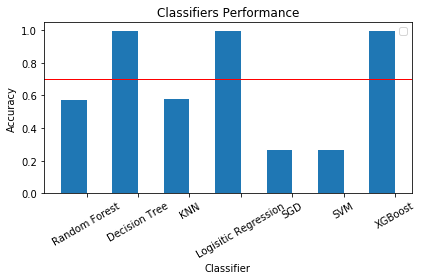

In [0]:
# plot accuracy bar chart

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Random Forest', 'Decision Tree', 'KNN', 'Logisitic Regression', 'SGD', 'SVM', 'XGBoost']
#accuracy = [0.577193	, 0.997368	, 0.578947, 0.998246, 0.480702	,0.480702, 0.998246	 ]
accuracy = result['Accuracy']

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Classifier')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation = 30)
ax.set_title('Classifiers Performance')
ax.legend()

plt.axhline(y=0.7,linewidth=1, color='r')

fig.tight_layout()

plt.show()